#### Instalação dos modulos

In [1]:
import bs4
import urllib.request as urllib_request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib import response
from numpy import extract


#### Importando módulos

In [2]:
animal_type = ('Cao','Gato')
gender = ('Macho','Femea')
size = ('Pequeno','Medio','Grande')
age = ('Abaixo-de-2-meses','2-a-6-meses','7-a-11-meses','1-ano','2-anos','3-anos','4-anos','5-anos','6-anos-Acima')
goal = ('Encontrado','Adocao','Procura-Perdido')

data = []
for z in goal:
  for a in age:
    for b in size:
      for c in gender:
        for d in animal_type:
            url_address="https://adotar.com.br/animais.aspx?cc=1484&cn=ms-campo-grande&finalidade={finalidade}&tipo={tipo}&porte={porte}&idade={idade}&sexo={sexo}".format(finalidade=z,tipo=d,porte=b,sexo=c,idade=a)
            response = urlopen(url_address)
            html = response.read()
            soup = BeautifulSoup(html, 'html.parser')
            res = soup.findAll('div', class_="listaAnimais")
          
            if len(res)>0:
              for item in res:
                pet = {}
                pet['goal'] = z
                pet['animal_type'] = d
                pet['gender'] = c
                pet['size'] = b
                pet['year'] = a
                if a == age[0] or a==age[1]:
                  pet['age'] = 'baby'
                elif a == age[2] or a==age[3]:
                  pet['age'] = 'children'
                else:
                  pet['age'] = 'adult'
                link = item.find('a')['href']
                link = 'https://adotar.com.br'+link
          
                pet['link'] = link
                photo = 'https://'+item.find('img')['src'][2:]
                pet['photo'] = photo
                name = item.find('div',{'class':'listaAnimaisDados'})
                name = name.get_text().split()
                pet['name'] = name[0]
                responseLink = urlopen(link)
                htmlLink = responseLink.read()
                soupLink = BeautifulSoup(htmlLink, 'html.parser')
                contact = soupLink.find('a',{"id":"mailprop"})
                if contact:
                  email = contact['href']
                  phone = contact.findNextSibling().find('a').getText()
                  pet['email'] = email[7:]
                  pet['phone'] = phone
                else:
                  pet['email'] = 'sem contato'
                  pet['phone'] = 'sem contato'
                data.append(pet)

In [3]:
len(data)

1026

In [4]:
import pandas as pd
dataset = pd.DataFrame(data)
dataset

,goal,animal_type,gender,size,year,age,link,photo,name,email,phone
0,Encontrado,Cao,Macho,Pequeno,Abaixo-de-2-meses,baby,https://adotar.com.br/ms-campo-grande/cao/enco...,https://adotar.com.br/painel/upload/2017-10/an...,filhotes,israel.riveroslescano@gmail.com,(67) 2525-5906\r\n
1,Encontrado,Gato,Macho,Pequeno,Abaixo-de-2-meses,baby,https://adotar.com.br/ms-campo-grande/gato/ado...,https://adotar.com.br/painel/upload/2021-01/an...,Nico,ameliade.oliveira98@gmail.com,(67) 99131-1051\r\n
2,Encontrado,Gato,Macho,Pequeno,Abaixo-de-2-meses,baby,https://adotar.com.br/ms-campo-grande/gato/enc...,https://adotar.com.br/painel/upload/2018-10/an...,sem,matheusborgescorrea@gmail.com,(67) 99682-9132\r\n
3,Encontrado,Cao,Macho,Pequeno,2-a-6-meses,baby,https://adotar.com.br/ms-campo-grande/cao/adoc...,https://adotar.com.br/painel/upload/2021-09/an...,Pretinho,ygoresaah@outlook.com,(67) 6799353-5060\r\n
4,Encontrado,Cao,Macho,Pequeno,2-a-6-meses,baby,https://adotar.com.br/ms-campo-grande/cao/enco...,https://adotar.com.br/painel/upload/2021-08/an...,Sem,soniameneghetivieira@gmail.com,(67) 99104-6930\r\n
...,...,...,...,...,...,...,...,...,...,...,...
1021,Procura-Perdido,Cao,Femea,Grande,6-anos-Acima,adult,https://adotar.com.br/ms-campo-grande/cao/proc...,https://adotar.com.br/painel/upload/2016-12/an...,Madona,robin.andreazzi@gmail.com,(67) 99129-4569\r\n
1022,Procura-Perdido,Cao,Femea,Grande,6-anos-Acima,adult,https://adotar.com.br/ms-campo-grande/cao/proc...,https://adotar.com.br/painel/upload/2016-07/an...,laika,malavazi28@yahoo.com.br,(67) 9681-7899\r\n
1023,Procura-Perdido,Cao,Femea,Grande,6-anos-Acima,adult,https://adotar.com.br/ms-campo-grande/cao/proc...,https://adotar.com.br/painel/upload/2013-07/an...,SUNA,sandra.mluz@hotmail.com,(67) 3382-3631\r\n
1024,Procura-Perdido,Cao,Femea,Grande,6-anos-Acima,adult,https://adotar.com.br/ms-campo-grande/cao/proc...,https://adotar.com.br/painel/upload/2009-07/an...,Cadela,mat_hrike@hotmail.com,(67) 3042-2946\r\n


In [ ]:
dataset.to_csv('dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')

# Nova seção

In [ ]:
dataset.dtypes



goal           object
animal_type    object
gender         object
size           object
year           object
age            object
link           object
photo          object
name           object
email          object
phone          object
dtype: object

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use('seaborn')

Animais para Adoção, Procurados e Encontrados em Campo Grande-**MS**

---



Procura-Perdido    821
Adocao             110
Encontrado          95
Name: goal, dtype: int64


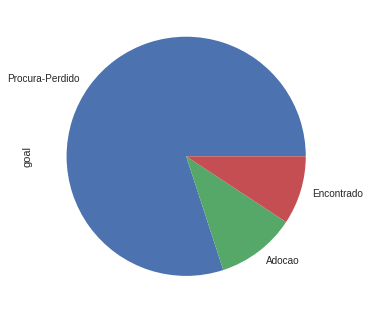

In [7]:
print(dataset['goal'].value_counts())
dataset['goal'].value_counts().plot.pie()



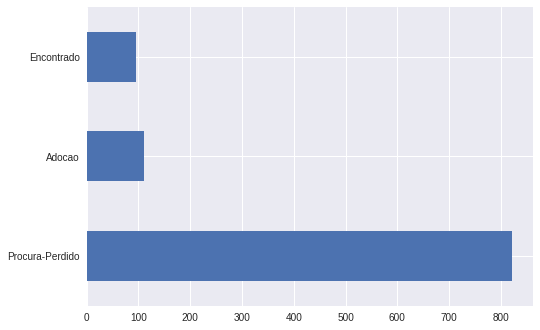

In [8]:
dataset['goal'].value_counts().plot.barh()

Animais para adoção em Campo Grande-MS separados por tipo (Cão e Gato)

In [18]:
type_set= dataset[(dataset['goal']=='Adocao')]
type_set['animal_type'].value_counts()

Gato    75
Cao     35
Name: animal_type, dtype: int64

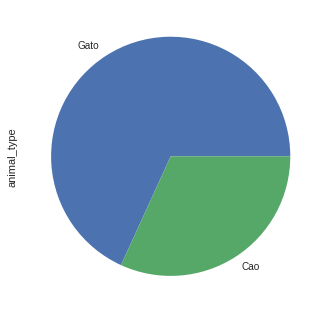

In [15]:
type_set['animal_type'].value_counts().plot.pie()

Cachorros para adoção separados por gênero(Macho ou Fêmea)

Femea    18
Macho    17
Name: gender, dtype: int64


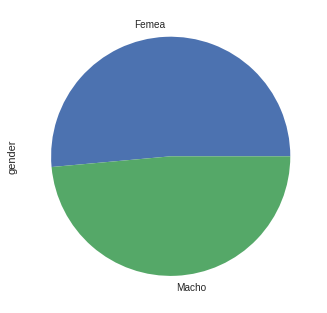

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Cao')]
print(goal_set['gender'].value_counts())
goal_set['gender'].value_counts().plot.pie()

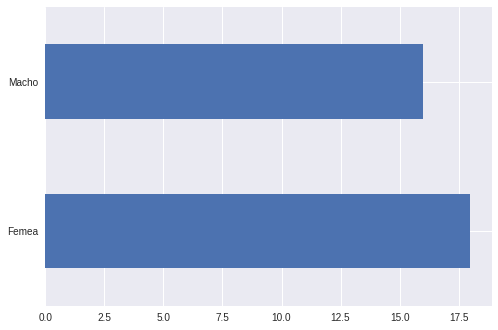

In [ ]:
 goal_set['gender'].value_counts().plot.barh()
 

Gatos para adoção em Campo Grande-MS separados por gênero(Macho e Fêmea)

Femea    46
Macho    29
Name: gender, dtype: int64


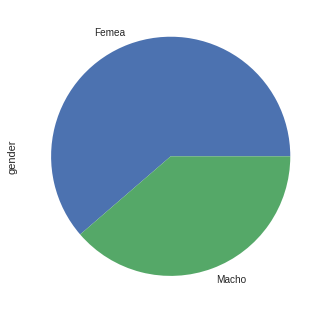

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Gato')]
print(goal_set['gender'].value_counts())
goal_set['gender'].value_counts().plot.pie()

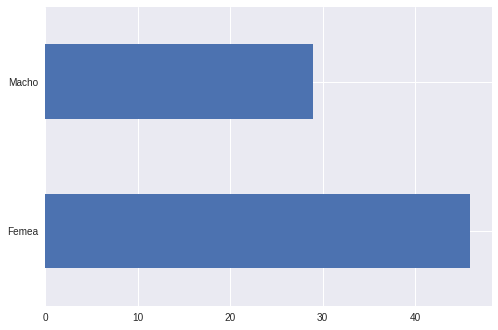

In [ ]:
goal_set['gender'].value_counts().plot.barh()

Cachorros Machos para adoção separados por porte (Pequeno, Médio e Grande).

Medio      10
Pequeno     5
Grande      1
Name: size, dtype: int64


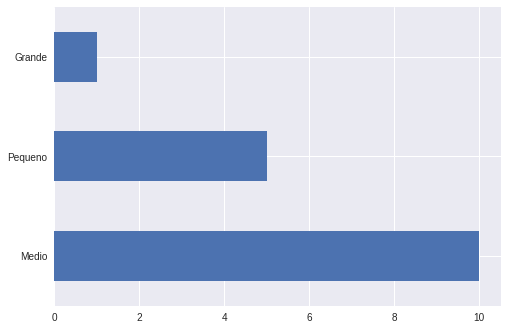

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Cao') & (dataset['gender']=='Macho')]
print(goal_set['size'].value_counts())
goal_set['size'].value_counts().plot.barh()

Cachorros Fêmeas para adoção separados por Porte(Pequeno, Médio e Grande).

Medio      13
Pequeno     5
Name: size, dtype: int64


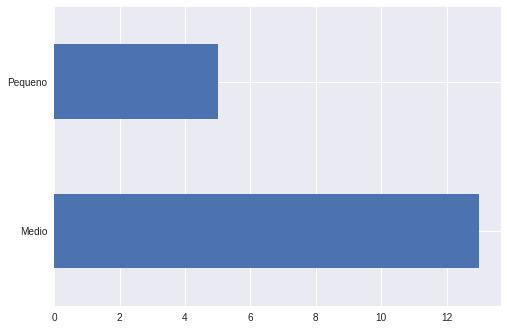

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Cao') & (dataset['gender']=='Femea')]
print(goal_set['size'].value_counts())
goal_set['size'].value_counts().plot.barh()

In [ ]:
Gatos Machos para adoção separados por Porte(Pequeno, Médio e Grande).

Pequeno    19
Medio      10
Name: size, dtype: int64


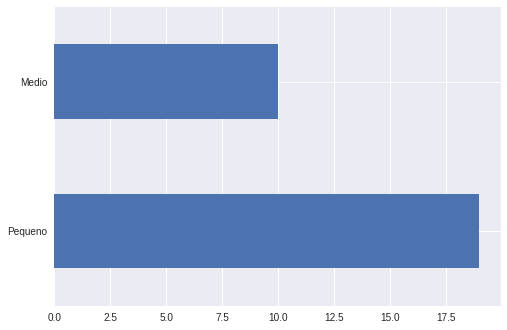

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Gato') & (dataset['gender']=='Macho')]
print(goal_set['size'].value_counts())
goal_set['size'].value_counts().plot.barh()

Gatos Fêmeas para adoção separadas por Porte

Pequeno    30
Medio      16
Name: size, dtype: int64


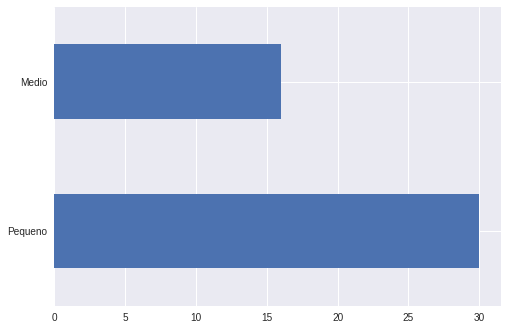

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Gato') & (dataset['gender']=='Femea')]
print(goal_set['size'].value_counts())
goal_set['size'].value_counts().plot.barh()

Gatos Machos para adoção separados por Idade

2-a-6-meses          11
Abaixo-de-2-meses     9
7-a-11-meses          4
1-ano                 3
5-anos                1
2-anos                1
Name: year, dtype: int64


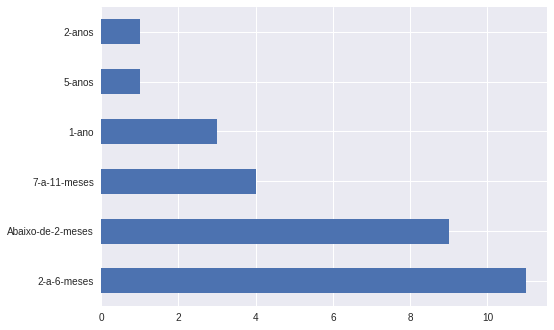

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Gato') & (dataset['gender']=='Macho')]
print(goal_set['year'].value_counts())
goal_set['year'].value_counts().plot.barh()

Gatos Fêmeas para adoção separados por idade.

2-a-6-meses          22
1-ano                12
Abaixo-de-2-meses     6
7-a-11-meses          5
3-anos                1
Name: year, dtype: int64


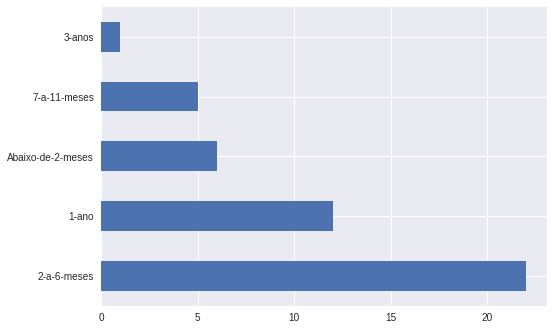

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Gato') & (dataset['gender']=='Femea')]
print(goal_set['year'].value_counts())
goal_set['year'].value_counts().plot.barh()

Cachorros Machos para adoção separados por Idade.

1-ano                6
2-a-6-meses          5
Abaixo-de-2-meses    2
4-anos               1
5-anos               1
7-a-11-meses         1
Name: year, dtype: int64


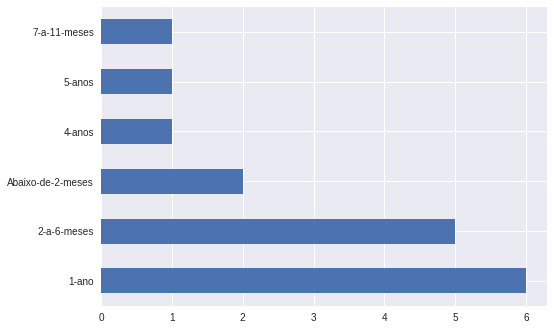

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Cao') & (dataset['gender']=='Macho')]
print(goal_set['year'].value_counts())
goal_set['year'].value_counts().plot.barh()

Cachorros Fêmeas para adoção separados por Idade.

7-a-11-meses    7
2-anos          4
5-anos          2
2-a-6-meses     2
3-anos          2
1-ano           1
Name: year, dtype: int64


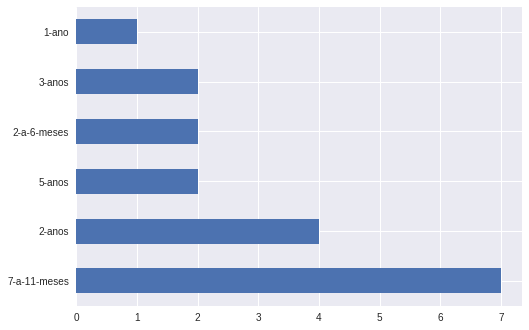

In [ ]:
goal_set = dataset[(dataset['goal']=='Adocao') & (dataset['animal_type']=='Cao') & (dataset['gender']=='Femea')]
print(goal_set['year'].value_counts())
goal_set['year'].value_counts().plot.barh()